# **Explaratory Data Analysis**



## **By Grace Ndunda**

Load Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [5]:
#load dataset
df=pd.read_csv("SampleSuperstore.csv")
df.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# **DATA CLEANING**


In [6]:
#Checking for null values
df.isnull().sum()
#No null values found

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

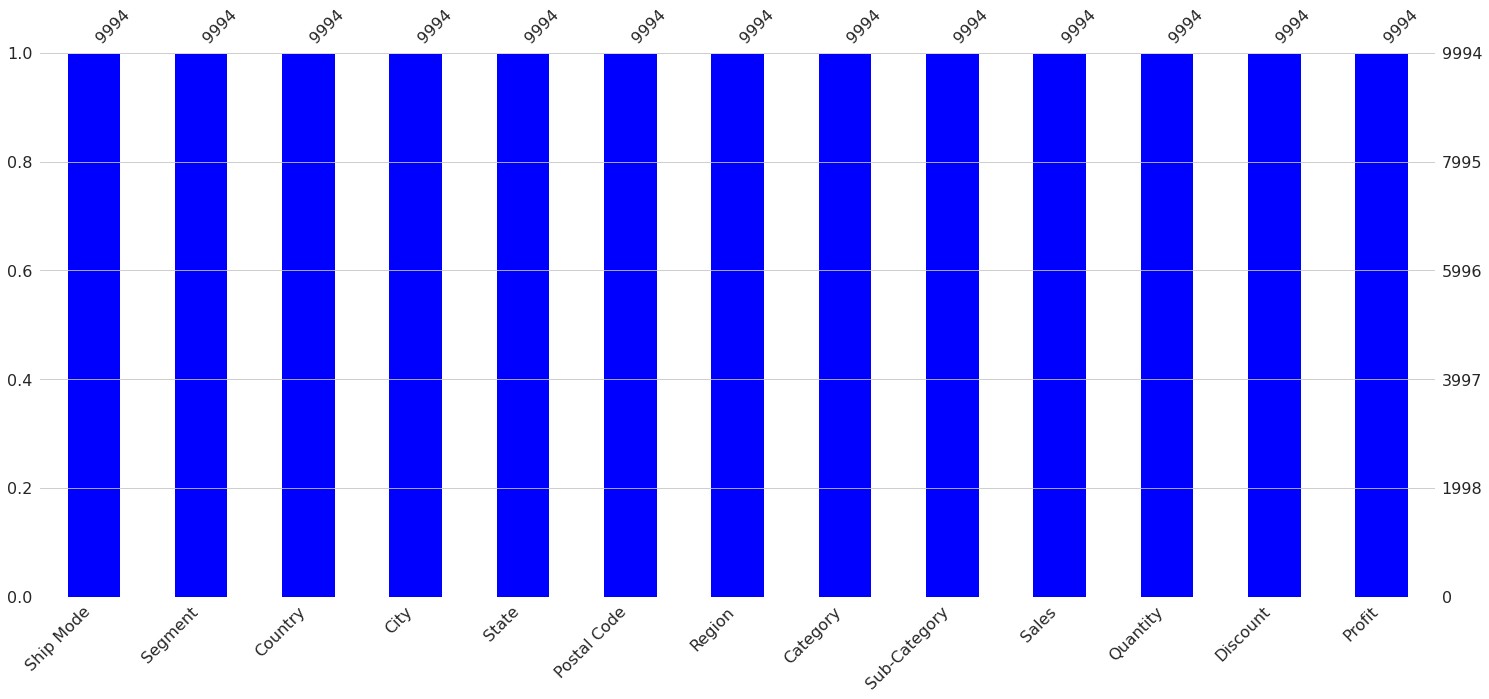

In [26]:
import missingno as msno

msno.bar(df,color = 'blue')
#confirming that there is no missing values in data

In [7]:
#checking for duplicated values
df.duplicated()
#No duplicated values

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

In [8]:
#check the data types of the columns
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [9]:
#Checking the number of unique value in each variable
df.nunique()


Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [10]:
#get the correlation between variables
df.corr()
# negatively correlated


,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


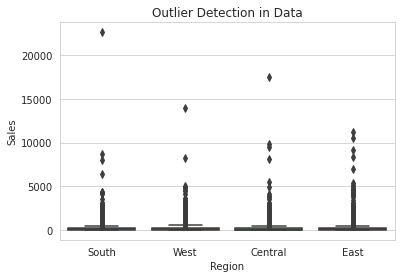

In [29]:
#check for outliers in sales Column

sns.boxplot(y=df["Sales"], x=df['Region'])
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Outlier Detection in Data')
plt.show()
#outliers detected

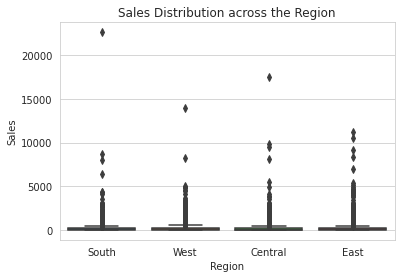

<Figure size 1000x1000 with 0 Axes>

In [30]:
# Univariate EDA

# Check for Sales  distribution across the Region

sns.boxplot(y=df['Sales'], x=df['Region'])
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Sales Distribution across the Region')
plt.figure(figsize=[10,10],dpi=100)
plt.show()


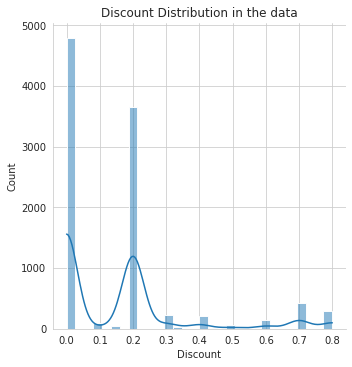

<Figure size 1600x800 with 0 Axes>

In [35]:
#distribution of Discount

sns.displot(df['Discount'],kde = True,bins = 30)
plt.title('Discount Distribution in the data')
plt.figure(figsize=(20,10),dpi=80)
plt.show()
#normally distributed

In [36]:
# Now lets test the normality of Discout using the shapiro - wilk test

from scipy.stats import shapiro
stat,p = shapiro(df.Discount)
print((stat,p))
alpha = 0.005
if stat > alpha:
  print('Normal Distribution')
else:
  print('Not Normal Distribution')
#The Shapiro-Wilk test tests the null hypothesis that the Discount
# data was drawn from a normal distribution.

# From the result, since 0.71 is greater than our alpha level ,we fail to reject the NULL hypothesis that data was drawn from a Normal Distribution


(0.7107365727424622, 0.0)
Normal Distribution


/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


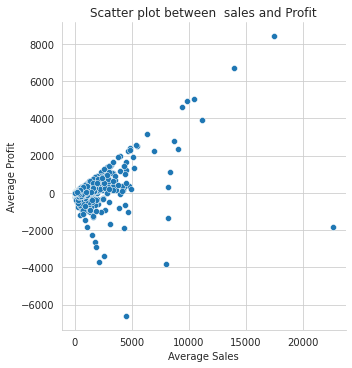

In [38]:
# Now for some Bivariate Analysis

sns.relplot(x = 'Sales',y = 'Profit',data = df)
plt.title('Scatter plot between  sales and Profit')
plt.xlabel('Average Sales')
plt.ylabel('Average Profit')
plt.show()
#positive corelation


In [39]:
# get the correlation coefficient between sales Scored and profit

coef = df['Sales'].corr(df['Profit'])

coef
#moderately corelated


0.4790643497377062

In [40]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'df_out'
# ---
# 
df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(df_out.shape)

# Printing the shape of our old dataset
# ---
#
print(df.shape)

(7143, 13)
(9994, 13)


<ipython-input-40-f60bcf3bbefa>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


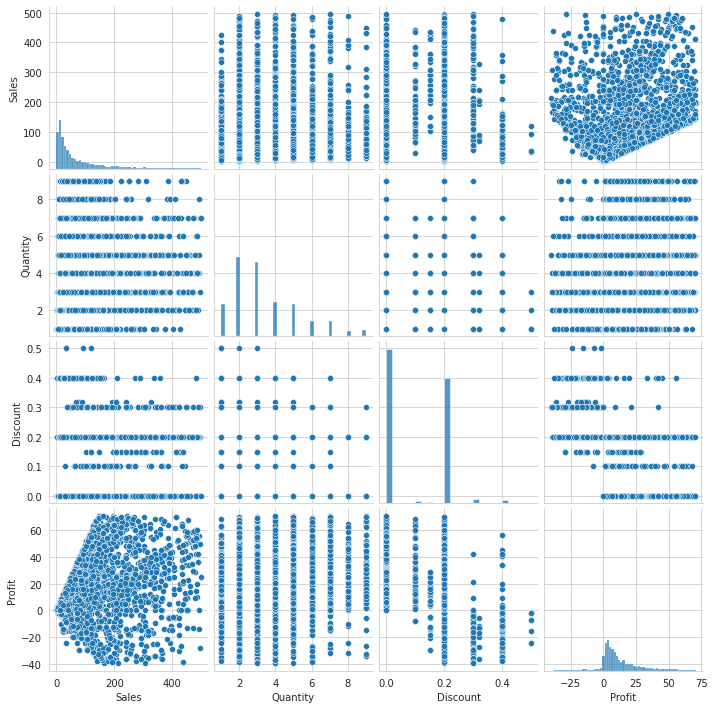

In [42]:
sns.pairplot(df_out[["Sales", "Quantity", "Discount",'Profit']])
plt.show()
## Now lets plot some pairplots from numerical columns of data

In [43]:
#get the count of unique values from the Region column
df_out['Region'].value_counts()
#West Region purchases more

West       2494
East       2042
Central    1444
South      1163
Name: Region, dtype: int64

In [44]:
#get the count of unique values from the category column
df_out['Category'].value_counts()

Office Supplies    4683
Furniture          1265
Technology         1195
Name: Category, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Region Distribution')

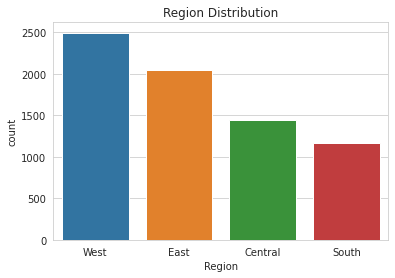

In [45]:
sns.set_style('whitegrid') 
sns.countplot(df_out['Region'],order = df_out['Region'].value_counts().index)
plt.title('Region Distribution')

In [16]:
#get the count of unique values from the State column
df_out['State'].value_counts()

California              1606
New York                 870
Texas                    567
Washington               403
Pennsylvania             370
Ohio                     306
Florida                  259
Illinois                 248
Michigan                 188
North Carolina           171
Virginia                 167
Arizona                  150
Georgia                  136
Tennessee                135
Colorado                 117
Indiana                  110
Kentucky                 101
Massachusetts            100
New Jersey                98
Oregon                    87
Maryland                  81
Delaware                  74
Wisconsin                 74
Minnesota                 67
Connecticut               62
Missouri                  54
Arkansas                  45
Oklahoma                  45
Alabama                   44
Utah                      42
Rhode Island              39
Mississippi               38
South Carolina            34
Louisiana                 33
Nebraska      

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'State distribution')

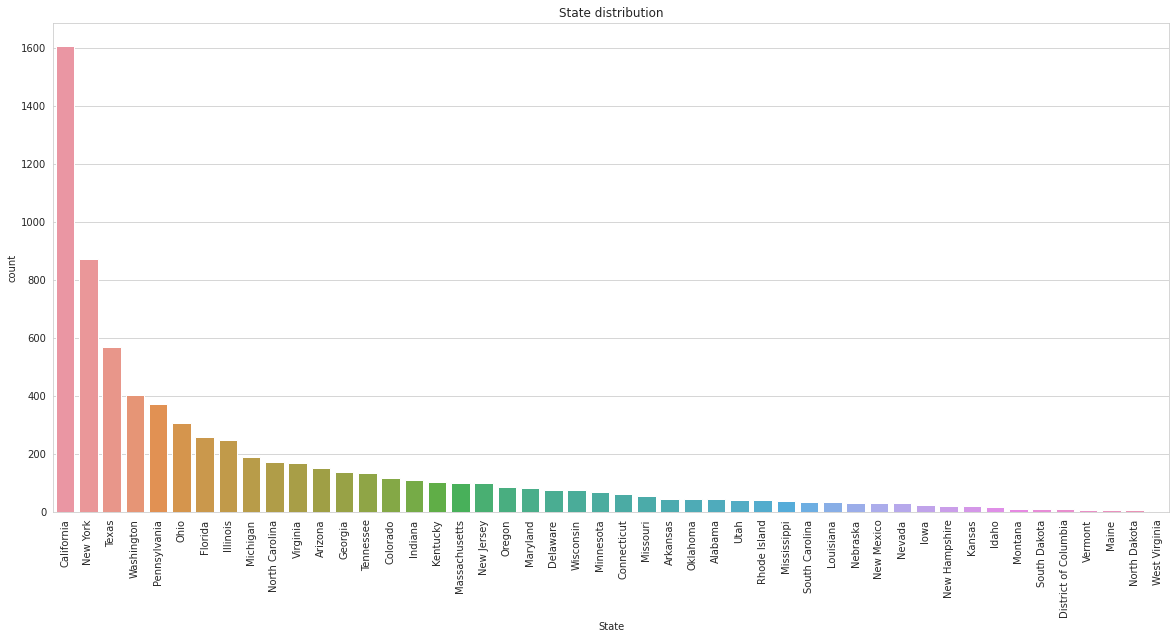

In [46]:
plt.figure(figsize=(20,9))
plt.xticks(rotation=90)
sns.set_style('whitegrid') 
sns.countplot(df_out['State'],order = df_out['State'].value_counts().index)
plt.title('State distribution')

In [18]:
#get the count of unique values from the City column
city = df_out['City'].value_counts()
city.head(10)

New York City    709
Los Angeles      600
San Francisco    411
Seattle          342
Philadelphia     340
Houston          207
Chicago          167
Columbus         153
San Diego        129
Springfield      118
Name: City, dtype: int64

Text(0.5, 1.0, 'Category Distribution')

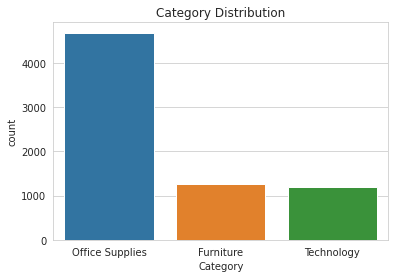

In [47]:
sns.set_style('whitegrid') 
sns.countplot(x = df_out['Category'], order = df_out['Category'].value_counts().index)
plt.title('Category Distribution')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sub category distribution')

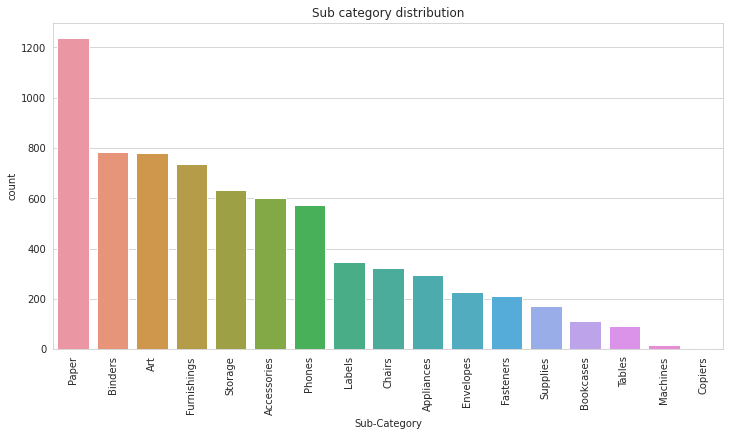

In [48]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90) 
sns.set_style('whitegrid') 
sns.countplot(df_out['Sub-Category'],order = df_out['Sub-Category'].value_counts().index)
plt.title('Sub category distribution')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Segment distribution')

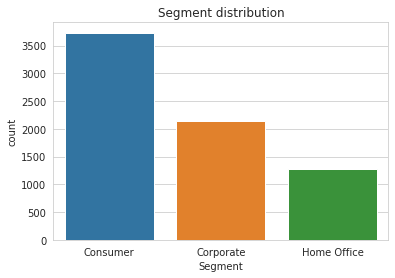

In [49]:
sns.set_style('whitegrid') 
sns.countplot(df_out['Segment'])
plt.title('Segment distribution')

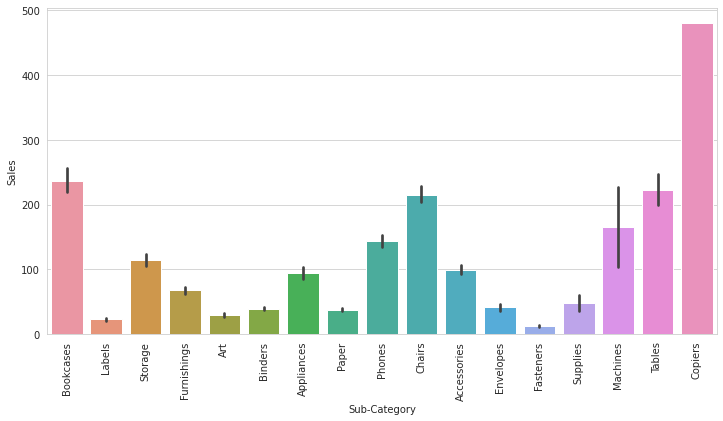

In [22]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90) 
sns.set_style('whitegrid') 
sns.barplot(x=df_out['Sub-Category'], y=df_out['Sales'])

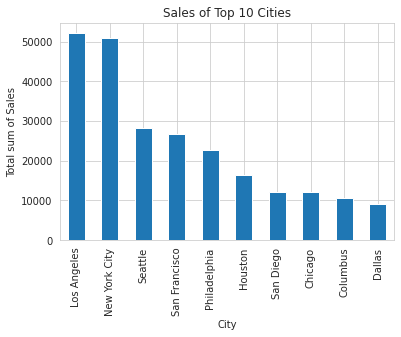

In [23]:
top10 = df_out.groupby('City')['Sales'].sum().sort_values(ascending = False).iloc[0:10]
plt.title('Sales of Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Total sum of Sales')
top10.plot(kind='bar')

In [24]:
#discount = df['Discount'].value_counts()
discount = df_out.groupby('City')['Discount'].value_counts().sort_values(ascending = False).iloc[0:10]
discount

City           Discount
New York City  0.0         527
Los Angeles    0.0         396
Philadelphia   0.2         294
San Francisco  0.0         291
Seattle        0.0         235
Los Angeles    0.2         197
Houston        0.2         190
Chicago        0.2         152
New York City  0.2         144
San Francisco  0.2         112
Name: Discount, dtype: int64

<ipython-input-50-4346de712bc7>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  overview = df_out.groupby('State')['Profit','Sales'].sum()


Text(0.5, 1.0, 'statewise sales and profit overview')

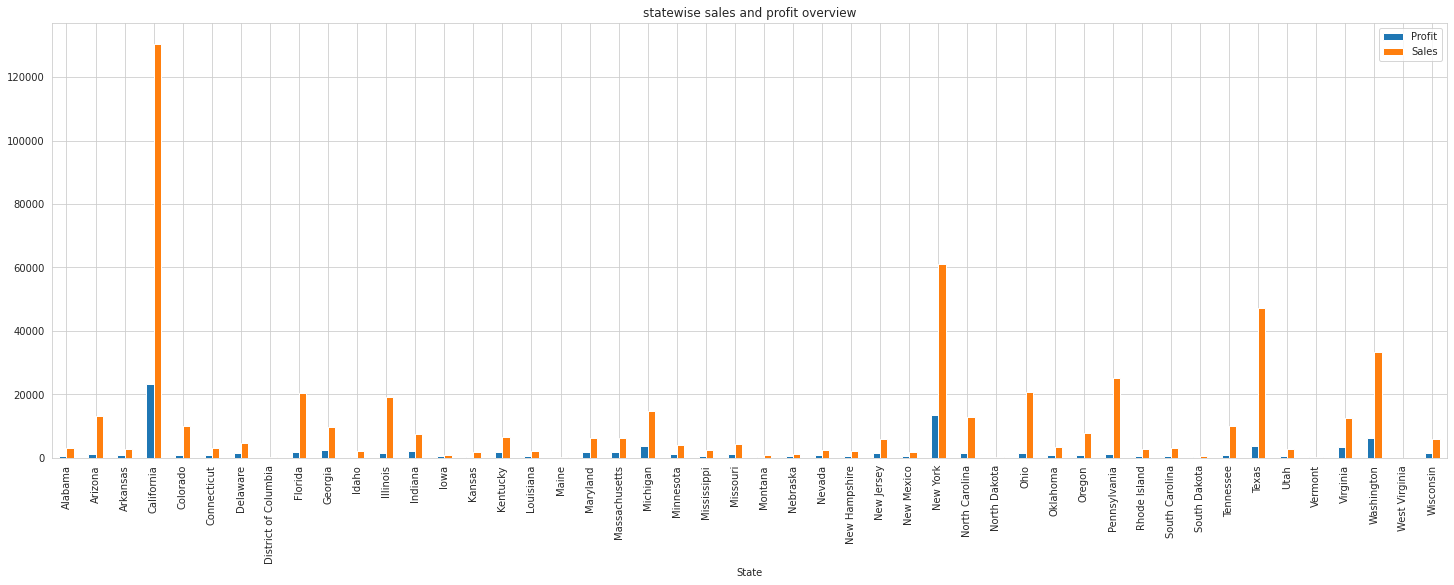

In [50]:
#statewise sales and profit overview
overview = df_out.groupby('State')['Profit','Sales'].sum()
overview.plot(kind='bar',figsize=(25,8))
plt.title('statewise sales and profit overview')